In [7]:
from google.colab import drive
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import seaborn as sns

In [8]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [9]:
!ls '/content/gdrive/MyDrive/datasets'

current_app.csv


In [10]:
df = pd.read_csv('/content/gdrive/MyDrive/datasets/current_app.csv')

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix


import xgboost as xgb
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import KNNImputer 
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics 

from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import roc_curve, auc, roc_auc_score, silhouette_score
from sklearn.decomposition import FastICA, PCA 

from sklearn.cluster import KMeans 

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree


import warnings
warnings.filterwarnings('ignore')

from tqdm import tqdm
import time

In [12]:
df = pd.read_csv('/content/gdrive/MyDrive/datasets/current_app.csv')
#df = pd.read_csv("current_app.csv")
df = df.drop('SK_ID_CURR', axis = 1)


In [13]:
df.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

# Data Preperation and Cleaning

In [14]:
# select the first 39 columns from dataset
filtered = df

# drop 'Occupation' varaible
del filtered['OCCUPATION_TYPE']
filtered.columns

Index(['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'], dtype='object', length=120)

In [15]:
filtered.shape

(307511, 120)

In [16]:
# extract columns names with numeric data.
numeric_vars = filtered.select_dtypes(include=np.number).columns.tolist() 

filtered[numeric_vars]=filtered[numeric_vars].fillna(filtered[numeric_vars].median())

In [17]:
cat_vars = [var for var in filtered.columns if var in ['FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 
                                                       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
                                                       'NAME_TYPE_SUITE', 'NAME_HOUSING_TYPE', 'WEEKDAY_APPR_PROCESS_START','WALLSMATERIAL_MODE',
                                                       'EMERGENCYSTATE_MODE','FONDKAPREMONT_MODE','HOUSETYPE_MODE','ORGANIZATION_TYPE',
                                                       'NAME_CONTRACT_TYPE','CODE_GENDER'
                                                      ]]
for var in cat_vars:
    df = pd.get_dummies(filtered[var], prefix = var, drop_first = True) 
    filtered = pd.concat([filtered, df], axis = 1)
    del filtered[var] 

In [18]:
filtered.shape

(307511, 212)

In [19]:
x = filtered.drop(['TARGET'], axis = 1)
y = filtered['TARGET']

In [20]:
columns = x.columns

In [21]:
# oversample = SMOTE()
# x, y = oversample.fit_resample(x, y)

In [22]:
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [23]:
#temp =['WALLSMATERIAL_MODE','EMERGENCYSTATE_MODE','FONDKAPREMONT_MODE','HOUSETYPE_MODE','ORGANIZATION_TYPE','NAME_CONTRACT_TYPE','CODE_GENDER']

In [24]:
#x_train[temp].nunique()

In [25]:
#x_train.dtypes

# Logistic Regression

In [26]:
# standardize the columns in train/validation datasets
for field in x_train.columns:
    standard_dev = x_train[field].std()
    mean = x_train[field].mean()
    
    x_train[field] = (x_train[field] - mean) / standard_dev
    x_valid[field] = (x_valid[field] - mean) / standard_dev

In [27]:
# fit logistic model
logit_model = LogisticRegression(random_state=0).fit(x_train, y_train)

In [28]:
# predict target from x_train/x_val dataset
y_train_pred = logit_model.predict(x_train)
y_val_pred = logit_model.predict(x_valid)

# calculate accuracy in train and validation dataset
print('Accuracy in train dataset: ', metrics.accuracy_score(y_train, y_train_pred))
print('Accuracy in validation dataset: ',metrics.accuracy_score(y_valid, y_val_pred))
print("\n")
# precision in train and validation dataset
print('Precision in train dataset: ', metrics.precision_score(y_train, y_train_pred))
print('Precision in validation dataset: ', metrics.precision_score(y_valid, y_val_pred))
print("\n")
# recall in train and validation dataset
print('Recall in train dataset: ', metrics.recall_score(y_train, y_train_pred))
print('Recall in validation dataset: ', metrics.recall_score(y_valid, y_val_pred))
print("\n")
# AUC
y_train_prob = logit_model.predict_proba(x_train)
y_val_prob = logit_model.predict_proba(x_valid)

# AUC in train and validation dataset
fpr, tpr, thresholds = metrics.roc_curve(y_train, y_train_prob[:,1], pos_label = 1)
print('AUC in train dataset: ', metrics.auc(fpr, tpr))
fpr, tpr, thresholds = metrics.roc_curve(y_valid, y_val_prob[:,1], pos_label = 1)
print('AUC in validation dataset: ', metrics.auc(fpr, tpr))

Accuracy in train dataset:  0.9191199357047622
Accuracy in validation dataset:  0.9193422507425152


Precision in train dataset:  0.5022935779816514
Precision in validation dataset:  0.4292929292929293


Recall in train dataset:  0.012577532736044108
Recall in validation dataset:  0.011466342911102118


AUC in train dataset:  0.7482259201847762
AUC in validation dataset:  0.74554249265311


In [29]:
# map coefficient for each variable
{col_name : coef for col_name, coef in zip(x_train.columns, logit_model.coef_[0])}

{'AMT_ANNUITY': 0.1551068728112786,
 'AMT_CREDIT': 0.8868939806865531,
 'AMT_GOODS_PRICE': -1.0028727973311595,
 'AMT_INCOME_TOTAL': -0.01732531825792051,
 'AMT_REQ_CREDIT_BUREAU_DAY': 0.009102516419181176,
 'AMT_REQ_CREDIT_BUREAU_HOUR': -0.007235815824149421,
 'AMT_REQ_CREDIT_BUREAU_MON': -0.0276125782565689,
 'AMT_REQ_CREDIT_BUREAU_QRT': -0.051831864299157863,
 'AMT_REQ_CREDIT_BUREAU_WEEK': -0.023319706386262982,
 'AMT_REQ_CREDIT_BUREAU_YEAR': 0.004456782768882807,
 'APARTMENTS_AVG': 0.1311848389959419,
 'APARTMENTS_MEDI': -0.0420390118808061,
 'APARTMENTS_MODE': -0.0644775242877404,
 'BASEMENTAREA_AVG': -0.3784839183074537,
 'BASEMENTAREA_MEDI': 0.281439718516849,
 'BASEMENTAREA_MODE': 0.08325546858301784,
 'CNT_CHILDREN': 0.008789585693207841,
 'CNT_FAM_MEMBERS': 0.01705756818843702,
 'CODE_GENDER_M': 0.17855707085830694,
 'CODE_GENDER_XNA': -0.04106418166721241,
 'COMMONAREA_AVG': 0.14037985941963826,
 'COMMONAREA_MEDI': -0.3753059139062175,
 'COMMONAREA_MODE': 0.212186705996219,


# Decision Tree

In [30]:
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [31]:
# # Used grid search / cross-validation to find the optimal set of parameters
# parameters = {"max_depth":range(2, 8), "min_samples_leaf": range(5, 55, 5), "min_samples_split": range(10, 110, 5)}

# clf = GridSearchCV(DecisionTreeClassifier(), parameters, n_jobs=4, scoring = "roc_auc", verbose=4)
# clf.fit(x_train, y_train)

# # best parameters
# clf.best_estimator_

# DecisionTreeClassifier(max_depth=5, min_samples_leaf=10, min_samples_split=95)

In [32]:
clf = DecisionTreeClassifier(max_depth=5, min_samples_split=95, min_samples_leaf=10)
clf.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=95,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [33]:
y_train_pred = clf.predict(x_train)
y_val_pred = clf.predict(x_valid)
y_train_prob = clf.predict_proba(x_train)
y_val_prob = clf.predict_proba(x_valid)
print("Training accuracy: ", metrics.accuracy_score(y_train, y_train_pred))
print("Validation accuracy: ", metrics.accuracy_score(y_valid, y_val_pred))
print("\n")
print("Training precision: ", metrics.precision_score(y_train, y_train_pred))
print("Validation precision: ", metrics.precision_score(y_train, y_train_pred))
print("\n")
print("Training recall: ", metrics.recall_score(y_train, y_train_pred))
print("Validation recall: ", metrics.recall_score(y_train, y_train_pred))
print("\n")
# auc
fpr, tpr, thresholds = metrics.roc_curve(y_train, y_train_prob[:,1], pos_label = 1)
print("Training AUC", metrics.auc(fpr, tpr))
fpr, tpr, thresholds = metrics.roc_curve(y_valid, y_val_prob[:,1], pos_label = 1)
print("Validation AUC", metrics.auc(fpr, tpr))

Training accuracy:  0.919110644485429
Validation accuracy:  0.9196457606174258


Training precision:  0.0
Validation precision:  0.0


Training recall:  0.0
Validation recall:  0.0


Training AUC 0.7114690077161939
Validation AUC 0.7068440780329037


In [34]:
# print out feature importance
imp = pd.DataFrame()

imp["var"] = x_train.columns
imp["imp"] = clf.feature_importances_

# sort the data frame by the feature importances in descending order - most important features at the top
imp = imp.sort_values("imp", ascending = False).reset_index(drop = True)

# print out the data frame with imp greater than 0
imp[imp['imp']>0]

,var,imp
0,EXT_SOURCE_3,0.479460
1,EXT_SOURCE_2,0.417410
2,EXT_SOURCE_1,0.054789
3,CODE_GENDER_M,0.031359
4,AMT_ANNUITY,0.004256
5,FLAG_DOCUMENT_3,0.003706
6,AMT_CREDIT,0.003514
7,NAME_CONTRACT_TYPE_Revolving loans,0.002979
8,ENTRANCES_AVG,0.002526


# XGBoost Model

In [35]:
# parameters = {
#         'max_depth': range(2, 6),
#         'n_estimators': [50, 100, 150, 200, 250, 300],
#         'subsample': [0.6, 0.7, 0.8],
#         'colsample_bytree': [0.2, 0.4, 0.5, 0.6, 0.7, 0.8, 1],
#         'colsample_bynode': [0.2, 0.4, 0.5, 0.6, 0.7, 0.8, 1],
#         'gamma': [0, 5, 10, 15, 20],
#         'learning_rate': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
#         'lambda': [0.1, 0.25, 0.5, 0.75, 1]
# }

# start = time.time() 

# clf = RandomizedSearchCV(xgb.XGBClassifier(use_label_encoder = False, eval_metric = "logloss"), 
#                          parameters, n_jobs=4, scoring = "roc_auc", n_iter = 120,
#                          random_state = 123)

# clf.fit(X_train, y_train)

# end = time.time()

# # print the number of seconds it takes to run the hyperparameter search
# print("Total time in seconds ==> ", end - start)
#clf.best_params_
# {'subsample': 0.6,
#  'n_estimators': 200,
#  'max_depth': 5,
#  'learning_rate': 0.3,
#  'lambda': 1,
#  'gamma': 0,
#  'colsample_bytree': 0.8,
#  'colsample_bynode': 1}

In [36]:
# Parameters calcualted using the randomized search above
clf =xgb.XGBClassifier(use_label_encoder = False, eval_metric = "logloss",
                                    subsample= 0.6, n_estimators= 200, max_depth= 5, 
                                    learning_rate= 0.3,gamma= 0, colsample_bytree= 0.8, 
                                    colsample_bynode= 1,reg_lambda=1)

In [37]:
clf.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, eval_metric='logloss',
              gamma=0, learning_rate=0.3, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.6, use_label_encoder=False, verbosity=1)

In [38]:
imp = pd.DataFrame()

# add a column for the variable names
imp["var"] = x_train.columns

# add a column with the feature importances
imp["imp"] = clf.feature_importances_

# sort the data frame by the feature importances in descending order - most important features at the top
imp = imp.sort_values("imp", ascending = False).reset_index(drop = True)

# print out the data frame
imp

,var,imp
0,EXT_SOURCE_3,0.018449
1,NAME_EDUCATION_TYPE_Higher education,0.017309
2,EXT_SOURCE_2,0.015565
3,NAME_INCOME_TYPE_Pensioner,0.012265
4,FLAG_DOCUMENT_3,0.011828
5,NAME_EDUCATION_TYPE_Secondary / secondary special,0.011535
6,CODE_GENDER_M,0.011172
7,FLAG_DOCUMENT_18,0.008893
8,NAME_INCOME_TYPE_State servant,0.008851
9,EXT_SOURCE_1,0.008706


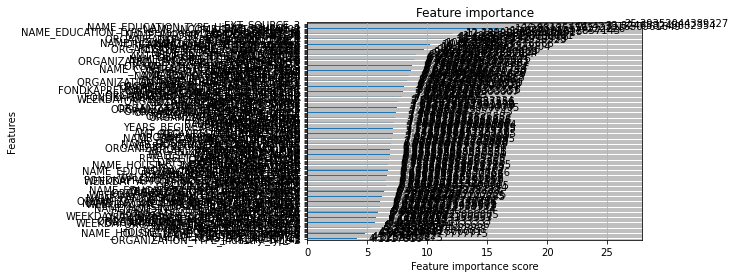

In [39]:
xgb.plot_importance(clf, importance_type = "gain", xlabel = "Feature importance score")

In [40]:
train_pred = clf.predict(x_train)
val_pred = clf.predict(x_valid)

In [41]:

print("Training accuracy: ", metrics.accuracy_score(y_train, train_pred))
print("Validation accuracy: ", metrics.accuracy_score(y_valid, val_pred), '\n')

print("Training recall: ", metrics.recall_score(y_train, train_pred))
print("Validation recall: ", metrics.recall_score(y_valid, val_pred))

print("\n")

print("Training precision: ", metrics.precision_score(y_train, train_pred))
print("Validation precision: ", metrics.precision_score(y_valid, val_pred))

print("\n")


print("\n")

y_train_prob = clf.predict_proba(x_train)
y_val_prob = clf.predict_proba(x_valid)

fpr, tpr, thresholds = metrics.roc_curve(y_train, y_train_prob[:,1], pos_label = 1)
print("Training AUC: ", metrics.auc(fpr, tpr))

fpr, tpr, thresholds = metrics.roc_curve(y_valid, y_val_prob[:,1], pos_label = 1)
print("Validation AUC: ", metrics.auc(fpr, tpr))

Training accuracy:  0.9246993129143303
Validation accuracy:  0.9179547770286384 

Training recall:  0.09585343441304847
Validation recall:  0.04343720491029273


Training precision:  0.7817330210772834
Validation precision:  0.4025




Training AUC:  0.851312071466212
Validation AUC:  0.7419924083541275


# Random Forest

In [42]:
# Used grid for hyperparameters tuning
# parameters = {"max_depth":range(2, 8), "min_samples_leaf": range(5, 100, 5), "min_samples_split": range(10, 550, 5),
#               "max_samples":[0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4], "max_features": [5, 10, 20, 25, 30],
#               "n_estimators": [100, 150, 200, 250, 300, 350, 400]}

# clf = RandomizedSearchCV(RandomForestClassifier(), parameters, n_jobs=4, scoring = "roc_auc", n_iter = 200,
#                         random_state = 0)

# clf.fit(x_train, y_train)

In [43]:
#clf.best_params_
# Best Parameters:
# {'n_estimators': 400,
#'min_samples_split': 520,
# 'min_samples_leaf': 55,
# 'max_samples': 0.3,
# 'max_features': 5,
# 'max_depth': 7}

In [44]:
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [45]:
clf = RandomForestClassifier(n_estimators=400,min_samples_split=520,min_samples_leaf=55,max_samples=0.3, max_features=5, max_depth=7, n_jobs=4)

In [46]:
clf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=7, max_features=5,
                       max_leaf_nodes=None, max_samples=0.3,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=55, min_samples_split=520,
                       min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=4,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [47]:
train_pred = clf.predict(x_train)
val_pred = clf.predict(x_valid)

In [48]:
print("Training recall: ", metrics.recall_score(y_train, train_pred))
print("Validation recall: ", metrics.recall_score(y_valid, val_pred))

print("\n")

print("Training precision: ", metrics.precision_score(y_train, train_pred))
print("Validation precision: ", metrics.precision_score(y_valid, val_pred))

print("\n")

print("Training accuracy: ", metrics.accuracy_score(y_train, train_pred))
print("Validation accuracy: ", metrics.accuracy_score(y_valid, val_pred))

print("\n")

y_train_prob = clf.predict_proba(x_train)
y_val_prob = clf.predict_proba(x_valid)

fpr, tpr, thresholds = metrics.roc_curve(y_train, y_train_prob[:,1], pos_label = 1)
print("Training AUC: ", metrics.auc(fpr, tpr))

fpr, tpr, thresholds = metrics.roc_curve(y_valid, y_val_prob[:,1], pos_label = 1)
print("Validation AUC: ", metrics.auc(fpr, tpr))

Training recall:  0.0
Validation recall:  0.0


Training precision:  0.0
Validation precision:  0.0


Training accuracy:  0.919110644485429
Validation accuracy:  0.9196457606174258


Training AUC:  0.7152602626635329
Validation AUC:  0.7060343345490034


# Neural Network

In [49]:
import tensorflow as tf
from tensorflow import keras

In [50]:

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scale=scaler.fit_transform(x)
X_scale.shape

(307511, 211)

In [51]:
train_X_nn, valid_X_nn, train_y_nn, valid_y_nn = train_test_split(X_scale, y, test_size=0.3, random_state=1)

In [52]:
model1 = tf.keras.Sequential([ tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(units=128, activation=tf.nn.relu),
                             tf.keras.layers.Dense(units=1,activation=tf.nn.sigmoid)])

In [53]:
model1.compile(optimizer= tf.optimizers.Adam(),
              loss = tf.losses.binary_crossentropy,
              metrics = ['accuracy'])

In [54]:
model1.fit(train_X_nn, train_y_nn, epochs = 15)

Epoch 1/15
6727/6727 [==============================] - 17s 2ms/step - loss: 0.2666 - accuracy: 0.9161
Epoch 2/15
6727/6727 [==============================] - 14s 2ms/step - loss: 0.2501 - accuracy: 0.9201
Epoch 3/15
6727/6727 [==============================] - 14s 2ms/step - loss: 0.2513 - accuracy: 0.9196
Epoch 4/15
6727/6727 [==============================] - 14s 2ms/step - loss: 0.2498 - accuracy: 0.9201
Epoch 5/15
6727/6727 [==============================] - 14s 2ms/step - loss: 0.2507 - accuracy: 0.9191
Epoch 6/15
6727/6727 [==============================] - 14s 2ms/step - loss: 0.2494 - accuracy: 0.9196
Epoch 7/15
6727/6727 [==============================] - 14s 2ms/step - loss: 0.2499 - accuracy: 0.9195
Epoch 8/15
6727/6727 [==============================] - 14s 2ms/step - loss: 0.2488 - accuracy: 0.9192
Epoch 9/15
6727/6727 [==============================] - 14s 2ms/step - loss: 0.2484 - accuracy: 0.9194
Epoch 10/15
6727/6727 [==============================] - 14s 2ms/step - l

In [55]:
model1.evaluate(valid_X_nn, valid_y_nn)

2883/2883 [==============================] - 5s 2ms/step - loss: 0.2556 - accuracy: 0.9190


[0.25559869408607483, 0.9190170764923096]

In [56]:
y_pred_valid = model1.predict(valid_X_nn).ravel()
y_pred = model1.predict(train_X_nn).ravel()

In [57]:

from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score,roc_auc_score,classification_report, confusion_matrix
# predict probabilities for test set
prediction_probs = model1.predict(valid_X_nn)
# predict classes
nn_prediction_train = (model1.predict(train_X_nn) > 0.5).astype("int32")
nn_prediction_valid = (model1.predict(valid_X_nn) > 0.5).astype("int32")

print("Accuracy on train is:",accuracy_score(train_y_nn,nn_prediction_train))
print("Accuracy on test is:",accuracy_score(valid_y_nn,nn_prediction_valid))
print("Precision_score train is:",precision_score(train_y_nn,nn_prediction_train))
print("Precision_score on test is:",precision_score(valid_y_nn,nn_prediction_valid))
print("Recall_score on train is:",recall_score(train_y_nn,nn_prediction_train))
print("Recall_score on test is:",recall_score(valid_y_nn,nn_prediction_valid))
print("f1_score on train is:",f1_score(train_y_nn,nn_prediction_train))
print("f1_score on test is:",f1_score(valid_y_nn,nn_prediction_valid))

Accuracy on train is: 0.9199886647124136
Accuracy on test is: 0.9190170615908253
Precision_score train is: 0.6762402088772846
Precision_score on test is: 0.4861111111111111
Recall_score on train is: 0.014921073856435074
Recall_score on test is: 0.009374581491897684
f1_score on train is: 0.029197903162166736
f1_score on test is: 0.018394429115753518


In [58]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(train_y_nn, y_pred)
print("NeuralNetworks Train: ",str(auc(fpr, tpr)))
#fpr, tpr, thresholds = roc_curve(valid_y,nn_prediction_valid)
fpr, tpr, thresholds = roc_curve(valid_y_nn, y_pred_valid)
print("NeuralNetworkss Valid: ",str(auc(fpr, tpr)),"\n")

NeuralNetworks Train:  0.7727442038145225
NeuralNetworkss Valid:  0.7340071508160068 



# SMOTE Testing

In [59]:
from imblearn.over_sampling import SMOTE

In [60]:
x = filtered.drop(['TARGET'], axis = 1)
y = filtered['TARGET']

In [61]:
oversample = SMOTE()
x, y = oversample.fit_resample(x, y)

In [62]:
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [63]:
x_train.shape

(395760, 211)

# Logistic Regression with SMOTE

In [64]:

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train=scaler.fit_transform(x_train)
x_valid=scaler.fit_transform(x_valid)
x_train.shape

(395760, 211)

In [65]:
# fit logistic model
logit_model = LogisticRegression(random_state=0).fit(x_train, y_train)

# predict target from x_train/x_val dataset
y_train_pred = logit_model.predict(x_train)
y_val_pred = logit_model.predict(x_valid)

# calculate accuracy in train and validation dataset
print('accuracy in train dataset: ', metrics.accuracy_score(y_train, y_train_pred))
print('accuracy in validation dataset: ',metrics.accuracy_score(y_valid, y_val_pred))

# precision in train and validation dataset
print('precision in train dataset: ', metrics.precision_score(y_train, y_train_pred))
print('precision in validation dataset: ', metrics.precision_score(y_valid, y_val_pred))

# recall in train and validation dataset
print('recall in train dataset: ', metrics.recall_score(y_train, y_train_pred))
print('recall in validation dataset: ', metrics.recall_score(y_valid, y_val_pred))

# AUC
y_train_prob = logit_model.predict_proba(x_train)
y_val_prob = logit_model.predict_proba(x_valid)

# AUC in train and validation dataset
fpr, tpr, thresholds = metrics.roc_curve(y_train, y_train_prob[:,1], pos_label = 1)
print('AUC in train dataset: ', metrics.auc(fpr, tpr))
fpr, tpr, thresholds = metrics.roc_curve(y_valid, y_val_prob[:,1], pos_label = 1)
print('AUC in validation dataset: ', metrics.auc(fpr, tpr))

accuracy in train dataset:  0.6991510006064281
accuracy in validation dataset:  0.6519821710728014
precision in train dataset:  0.6966350973263312
precision in validation dataset:  0.7539514967342187
recall in train dataset:  0.7057584163218287
recall in validation dataset:  0.45074144419408496
AUC in train dataset:  0.7654200101019216
AUC in validation dataset:  0.7637906295729728


# Decision Tree SMOTE

In [66]:
x = filtered.drop(['TARGET'], axis = 1)
y = filtered['TARGET']

In [67]:
oversample = SMOTE()
x, y = oversample.fit_resample(x, y)

In [68]:
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [69]:
clf = DecisionTreeClassifier(max_depth=5, min_samples_split=95, min_samples_leaf=10)
clf.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=95,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [70]:
y_train_pred = clf.predict(x_train)
y_val_pred = clf.predict(x_valid)
y_train_prob = clf.predict_proba(x_train)
y_val_prob = clf.predict_proba(x_valid)
print("Training accuracy: ", metrics.accuracy_score(y_train, y_train_pred))
print("Validation accuracy: ", metrics.accuracy_score(y_valid, y_val_pred))
print("\n")
print("Training precision: ", metrics.precision_score(y_train, y_train_pred))
print("Validation precision: ", metrics.precision_score(y_train, y_train_pred))
print("\n")
print("Training recall: ", metrics.recall_score(y_train, y_train_pred))
print("Validation recall: ", metrics.recall_score(y_train, y_train_pred))
print("\n")
# auc
fpr, tpr, thresholds = metrics.roc_curve(y_train, y_train_prob[:,1], pos_label = 1)
print("Training AUC", metrics.auc(fpr, tpr))
fpr, tpr, thresholds = metrics.roc_curve(y_valid, y_val_prob[:,1], pos_label = 1)
print("Validation AUC", metrics.auc(fpr, tpr))

Training accuracy:  0.8186400848999393
Validation accuracy:  0.8189043228073485


Training precision:  0.819711270390008
Validation precision:  0.819711270390008


Training recall:  0.8170564725973757
Validation recall:  0.8170564725973757


Training AUC 0.8961085598224829
Validation AUC 0.8955765377117056


# XGBoost SMOTE

In [71]:
# Parameters calcualted using the randomized search above
clf2 =xgb.XGBClassifier(use_label_encoder = False, eval_metric = "logloss",
                                    subsample= 0.6, n_estimators= 200, max_depth= 5, 
                                    learning_rate= 0.3,gamma= 0, colsample_bytree= 0.8, 
                                    colsample_bynode= 1,reg_lambda=1)

In [72]:
clf2.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, eval_metric='logloss',
              gamma=0, learning_rate=0.3, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.6, use_label_encoder=False, verbosity=1)

In [73]:
train_pred = clf2.predict(x_train)
val_pred = clf2.predict(x_valid)

In [74]:

print("Training accuracy: ", metrics.accuracy_score(y_train, train_pred))
print("Validation accuracy: ", metrics.accuracy_score(y_valid, val_pred), '\n')

print("Training recall: ", metrics.recall_score(y_train, train_pred))
print("Validation recall: ", metrics.recall_score(y_valid, val_pred))

print("\n")

print("Training precision: ", metrics.precision_score(y_train, train_pred))
print("Validation precision: ", metrics.precision_score(y_valid, val_pred))

print("\n")


print("\n")

y_train_prob = clf.predict_proba(x_train)
y_val_prob = clf.predict_proba(x_valid)

fpr, tpr, thresholds = metrics.roc_curve(y_train, y_train_prob[:,1], pos_label = 1)
print("Training AUC: ", metrics.auc(fpr, tpr))

fpr, tpr, thresholds = metrics.roc_curve(y_valid, y_val_prob[:,1], pos_label = 1)
print("Validation AUC: ", metrics.auc(fpr, tpr))

Training accuracy:  0.9584950475035375
Validation accuracy:  0.9555691814258425 

Training recall:  0.9191335849514195
Validation recall:  0.9155685585192351


Training precision:  0.9976910631529876
Validation precision:  0.9951403403044019




Training AUC:  0.8961085598224829
Validation AUC:  0.8955765377117056


# Random Forest SMOTE

In [75]:
clf3 = RandomForestClassifier(n_estimators=400,min_samples_split=520,min_samples_leaf=55,max_samples=0.3, max_features=5, max_depth=7, n_jobs=4)

In [76]:
clf3.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=7, max_features=5,
                       max_leaf_nodes=None, max_samples=0.3,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=55, min_samples_split=520,
                       min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=4,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [77]:
train_pred = clf3.predict(x_train)
val_pred = clf3.predict(x_valid)

In [78]:
print("Training recall: ", metrics.recall_score(y_train, train_pred))
print("Validation recall: ", metrics.recall_score(y_valid, val_pred))

print("\n")

print("Training precision: ", metrics.precision_score(y_train, train_pred))
print("Validation precision: ", metrics.precision_score(y_valid, val_pred))

print("\n")

print("Training accuracy: ", metrics.accuracy_score(y_train, train_pred))
print("Validation accuracy: ", metrics.accuracy_score(y_valid, val_pred))

print("\n")

y_train_prob = clf.predict_proba(x_train)
y_val_prob = clf.predict_proba(x_valid)

fpr, tpr, thresholds = metrics.roc_curve(y_train, y_train_prob[:,1], pos_label = 1)
print("Training AUC: ", metrics.auc(fpr, tpr))

fpr, tpr, thresholds = metrics.roc_curve(y_valid, y_val_prob[:,1], pos_label = 1)
print("Validation AUC: ", metrics.auc(fpr, tpr))

Training recall:  0.8933351522592575
Validation recall:  0.8935670720917338


Training precision:  0.9560341518014048
Validation precision:  0.9567144950234931


Training accuracy:  0.9261117849201537
Validation accuracy:  0.9266030705374619


Training AUC:  0.8961085598224829
Validation AUC:  0.8955765377117056


# Neural Network Smote

In [79]:

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scale=scaler.fit_transform(x)
X_scale.shape

(565372, 211)

In [80]:
train_X_nn, valid_X_nn, train_y_nn, valid_y_nn = train_test_split(X_scale, y, test_size=0.3, random_state=1)

In [81]:
model2 = tf.keras.Sequential([ tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(units=128, activation=tf.nn.relu),
                             tf.keras.layers.Dense(units=1,activation=tf.nn.sigmoid)])

In [82]:
model2.compile(optimizer= tf.optimizers.Adam(),
              loss = tf.losses.binary_crossentropy,
              metrics = ['accuracy'])

In [83]:
model2.fit(train_X_nn, train_y_nn, epochs = 15)

Epoch 1/15
12368/12368 [==============================] - 26s 2ms/step - loss: 0.4652 - accuracy: 0.7765
Epoch 2/15
12368/12368 [==============================] - 26s 2ms/step - loss: 0.2608 - accuracy: 0.8938
Epoch 3/15
12368/12368 [==============================] - 26s 2ms/step - loss: 0.2227 - accuracy: 0.9132
Epoch 4/15
12368/12368 [==============================] - 26s 2ms/step - loss: 0.2057 - accuracy: 0.9214
Epoch 5/15
12368/12368 [==============================] - 26s 2ms/step - loss: 0.1974 - accuracy: 0.9260
Epoch 6/15
12368/12368 [==============================] - 26s 2ms/step - loss: 0.1893 - accuracy: 0.9298
Epoch 7/15
12368/12368 [==============================] - 26s 2ms/step - loss: 0.1847 - accuracy: 0.9318
Epoch 8/15
12368/12368 [==============================] - 26s 2ms/step - loss: 0.1807 - accuracy: 0.9338
Epoch 9/15
12368/12368 [==============================] - 26s 2ms/step - loss: 0.1765 - accuracy: 0.9359
Epoch 10/15
12368/12368 [==============================

In [84]:
model2.evaluate(valid_X_nn, valid_y_nn)

5301/5301 [==============================] - 8s 2ms/step - loss: 0.1759 - accuracy: 0.9406


[0.17591916024684906, 0.9406115412712097]

In [85]:
y_pred_valid = model2.predict(valid_X_nn).ravel()


In [ ]:
y_pred = model2.predict(train_X_nn).ravel()

In [86]:

from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score,roc_auc_score,classification_report, confusion_matrix
# predict probabilities for test set
prediction_probs = model2.predict(valid_X_nn)
# predict classes


Accuracy on train is: 0.9439053972104305
Accuracy on test is: 0.9406115133363205
Precision_score train is: 0.9934226416154127
Precision_score on test is: 0.990160062975597
Recall_score on train is: 0.8937355035296852
Recall_score on test is: 0.8900498861934357
f1_score on train is: 0.9409461386222894
f1_score on test is: 0.9374398340506667
NeuralNetworks Train:  0.9779251957695518
NeuralNetworkss Valid:  0.9708581716064311 



In [87]:
nn_prediction_train = (model2.predict(train_X_nn) > 0.5).astype("int32")


In [88]:
nn_prediction_valid = (model2.predict(valid_X_nn) > 0.5).astype("int32")



In [89]:
print("Accuracy on train is:",accuracy_score(train_y_nn,nn_prediction_train))
print("Accuracy on test is:",accuracy_score(valid_y_nn,nn_prediction_valid))
print("Precision_score train is:",precision_score(train_y_nn,nn_prediction_train))
print("Precision_score on test is:",precision_score(valid_y_nn,nn_prediction_valid))
print("Recall_score on train is:",recall_score(train_y_nn,nn_prediction_train))
print("Recall_score on test is:",recall_score(valid_y_nn,nn_prediction_valid))
print("f1_score on train is:",f1_score(train_y_nn,nn_prediction_train))
print("f1_score on test is:",f1_score(valid_y_nn,nn_prediction_valid))

from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(train_y_nn, y_pred)
print("NeuralNetworks Train: ",str(auc(fpr, tpr)))
#fpr, tpr, thresholds = roc_curve(valid_y,nn_prediction_valid)
fpr, tpr, thresholds = roc_curve(valid_y_nn, y_pred_valid)
print("NeuralNetworkss Valid: ",str(auc(fpr, tpr)),"\n")

Accuracy on train is: 0.9439053972104305
Accuracy on test is: 0.9406115133363205
Precision_score train is: 0.9934226416154127
Precision_score on test is: 0.990160062975597
Recall_score on train is: 0.8937355035296852
Recall_score on test is: 0.8900498861934357
f1_score on train is: 0.9409461386222894
f1_score on test is: 0.9374398340506667
NeuralNetworks Train:  0.9779251957695518
NeuralNetworkss Valid:  0.9708581716064311 

